# Introduction
* **Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19.COVID-19 is the infectious disease caused by the most recently discovered coronavirus. This new virus and disease were unknown before the outbreak began in Wuhan, China, in December 2019.**
* [Source](https://www.who.int/emergencies/diseases/novel-coronavirus-2019/question-and-answers-hub/q-a-detail/q-a-coronaviruses)
<img src = "https://i4.hurimg.com/i/hurriyet/75/0x0/5eb3121e67b0a908d8c64551.jpg" />

<hr>

### If you are looking for a deep analysis on Covid-19 you can check out this kernel:
<div class="row">
  <div class="col-sm-4">
    <div class="card">
      <div class="card-body" style="width: 40rem;">
         <h5 class="card-title"><u>Deep Analysis on Covid-19</u></h5>
         <img style='height:300px'
src="https://www.catalannews.com/images/cna/images/2020/03/flattening-the-curve.jpg" alt="...">
<br>
         <a href="https://www.kaggle.com/mrhippo/deep-analysis-on-covid-19" class="btn btn-primary" style="color:white;">Go to Post</a>
      </div>
    </div>
  </div> 
</div>


<hr>

>## Content
>* [Imports and Preprocessing](#1)
>* [Preparing Data for CNN](#2)
>* [CNN Model](#3)
>    * [Results](#3.1)
>* [Conclusion](#4)

<a id="1"></a> <br>
# Imports and Dataset

In [1]:
# Data preprocessing
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

# Deep learning
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf 
from tensorflow.keras.preprocessing import image

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/COVID-19.metadata.xlsx
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL.metadata.xlsx
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/README.md.txt
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia.matadata.xlsx
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/NORMAL (535).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/NORMAL (216).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/NORMAL (533).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/NORMAL (280).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/NORMAL (155).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/NORMAL (1097).png
/kaggle/input/covid19-radiography-dat

/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/NORMAL (917).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/NORMAL (1085).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/NORMAL (1106).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/NORMAL (1203).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/NORMAL (511).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/NORMAL (362).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/NORMAL (321).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/NORMAL (633).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/NORMAL (744).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/NORMAL/NORMAL (406).png
/kaggle/input/covid19-radio

/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (819).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1135).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (717).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (737).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (834).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (1155).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (395).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral Pneumonia/Viral Pneumonia (773).png
/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database/Viral

<a id="2"></a> <br>
# Preparing Data for CNN

In [2]:
DATASET_DIR = "/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database"

os.listdir(DATASET_DIR)

['NORMAL',
 'Viral Pneumonia',
 'COVID-19.metadata.xlsx',
 'NORMAL.metadata.xlsx',
 'README.md.txt',
 'COVID-19',
 'Viral Pneumonia.matadata.xlsx']

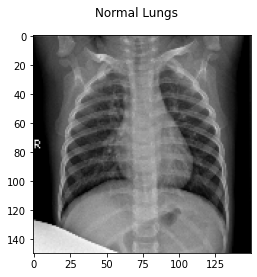

In [3]:
normal_images = []
count = 0

for img_path in glob.glob(DATASET_DIR + "/NORMAL/*"):
    count += 1
    normal_images.append(image.load_img(str(img_path), target_size = (150,150,3)))
    if count > 230:
        break
    
fig = plt.figure()
fig.suptitle("Normal Lungs")
plt.imshow(normal_images[0], cmap="gray")
plt.show()

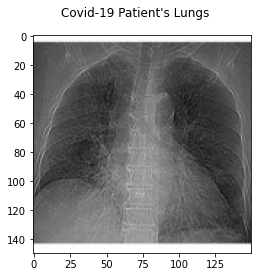

In [4]:
covid_images = []
for img_path in glob.glob(DATASET_DIR + "/COVID-19/*"): 
    covid_images.append(image.load_img(str(img_path), target_size = (150,150,3)))
    
fig = plt.figure()
fig.suptitle("Covid-19 Patient's Lungs ")
plt.imshow(covid_images[0], cmap = "gray")
plt.show()

In [5]:
print(str(len(normal_images))+" normal patient images")
print(str(len(covid_images))+" covid patient images")

231 normal patient images
219 covid patient images


In [6]:
images_together = []

for i in normal_images:
    images_together.append(img_to_array(i))
    
for i in covid_images:
    images_together.append(img_to_array(i))
    
targets = np.zeros(len(images_together))
targets[:len(normal_images)-1] = 1 # normal-> 1, covid-19-> 0

In [7]:
print("image list length: ",len(images_together))
print("target list length: ",len(targets))

image list length:  450
target list length:  450


In [8]:
targets = np.array(targets)
print("targets: ",targets.shape)
targets = targets.reshape(-1,1)
print("new shape of targets: ",targets.shape)

targets:  (450,)
new shape of targets:  (450, 1)


In [9]:
images_together = np.array(images_together)
print("shape of images together: ",images_together.shape)

shape of images together:  (450, 150, 150, 3)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(images_together, targets, test_size=0.25, stratify=targets)

images_together = np.concatenate((X_train, X_val))
targets = np.concatenate((y_train, y_val))

<a id="3"></a> <br>
# CNN Model

In [11]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 32
BATCH_SIZE = 40

* **Our model's diagram:**
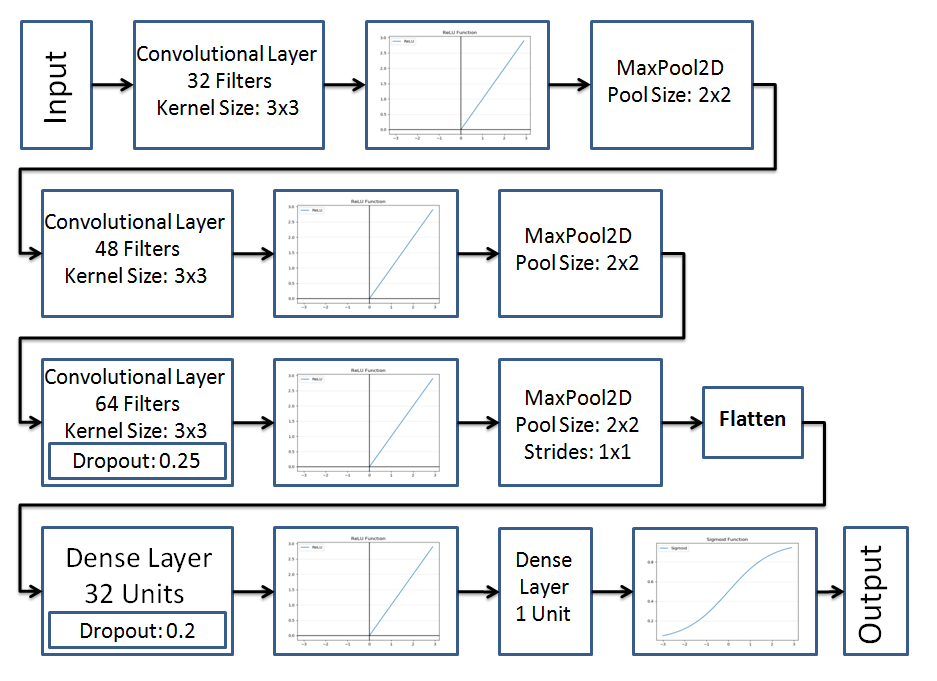

In [12]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = INPUT_SHAPE, activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 48, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2), strides = (1,1)))
model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

# compile 
model.compile(loss = "binary_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 48)        13872     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        27712     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 33, 33, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 33, 33, 64)        0

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  validation_split = 0.25)


train_generator = train_datagen.flow(
images_together, targets,
batch_size = BATCH_SIZE,
subset = "training")

validation_generator = train_datagen.flow(
images_together, targets,
batch_size = BATCH_SIZE,
shuffle = False,
subset = "validation")

#fitting
hist = model.fit_generator(
train_generator,
steps_per_epoch = (450*0.75)//BATCH_SIZE,
validation_data = validation_generator,
validation_steps = (450*0.25)// BATCH_SIZE,
epochs = EPOCHS)

Epoch 1/32
8/8 [==============================] - 7s 871ms/step - loss: 1.4536 - accuracy: 0.5281 - val_loss: 0.6933 - val_accuracy: 0.4375
Epoch 2/32
8/8 [==============================] - 6s 752ms/step - loss: 0.6933 - accuracy: 0.4631 - val_loss: 0.6853 - val_accuracy: 0.5500
Epoch 3/32
8/8 [==============================] - 6s 804ms/step - loss: 0.6730 - accuracy: 0.6141 - val_loss: 0.6672 - val_accuracy: 0.7125
Epoch 4/32
8/8 [==============================] - 6s 763ms/step - loss: 0.6342 - accuracy: 0.6846 - val_loss: 0.6934 - val_accuracy: 0.4375
Epoch 5/32
8/8 [==============================] - 6s 749ms/step - loss: 0.6426 - accuracy: 0.7450 - val_loss: 0.9632 - val_accuracy: 0.4375
Epoch 6/32
8/8 [==============================] - 6s 812ms/step - loss: 0.6294 - accuracy: 0.7315 - val_loss: 0.5389 - val_accuracy: 0.7500
Epoch 7/32
8/8 [==============================] - 6s 807ms/step - loss: 0.6253 - accuracy: 0.7718 - val_loss: 0.4959 - val_accuracy: 0.7875
Epoch 8/32
8/8 [====

<a id="3.1"></a> <br>
## Results

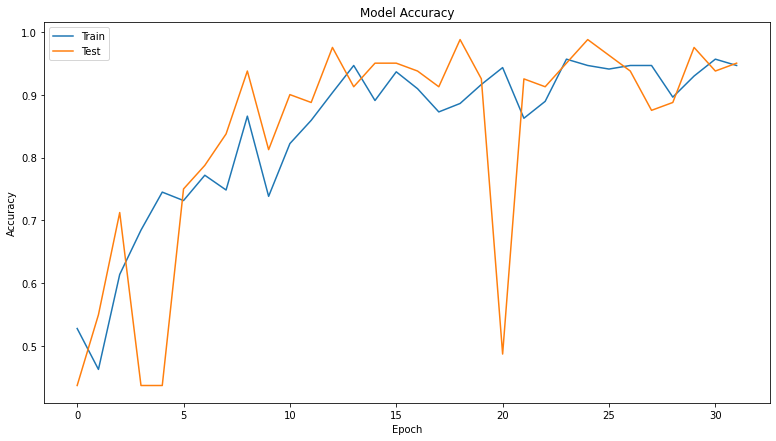

In [15]:
plt.figure(figsize = (13,7))
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
#plt.text(23,0.5,"Current Training Accuracy: "+str(np.round(hist.history["accuracy"][-1]*100,2))+"%",fontsize = 18,color = "black")
#plt.text(23,0.46,"Current Validation Accuracy: "+str(np.round(hist.history["val_accuracy"][-1]*100,2))+"%",fontsize = 18,color = "black")
plt.show()

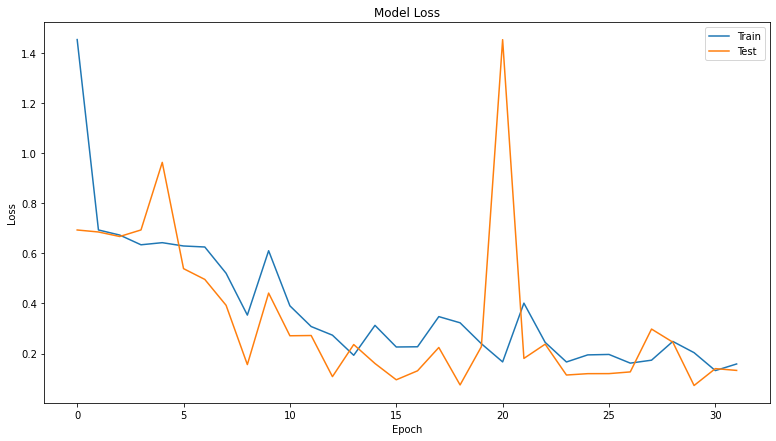

In [16]:
plt.figure(figsize = (13,7))
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper right")
#plt.text(26,0.8,"Current Training Loss: "+str(np.round(hist.history["loss"][-1],3)),fontsize = 18,color = "black")
#plt.text(26,0.73,"Current Validation Loss: "+str(np.round(hist.history["val_loss"][-1],3)),fontsize = 18,color = "black")
plt.show()

In [17]:
print("Training Accuracy: "+str(np.round(hist.history["accuracy"][-1]*100,2))+"%")
print("Validation Accuracy: "+str(np.round(hist.history["val_accuracy"][-1]*100,2))+"%")

Training Accuracy: 94.63%
Validation Accuracy: 95.0%


In [18]:
model.save("cnn_covid_x-ray_v1.h5") #you can load this model from output part

<a id="4"></a> <br>
# Conclusion
* **If there is something wrong with this kernel please let me know in the comments.**

### My other kernels: https://www.kaggle.com/mrhippo/notebooks